# MNIST Using Keras and Convolution Neural Networs

Links:
* https://elitedatascience.com/keras-tutorial-deep-learning-in-python#step-3
* https://machinelearningmastery.com/handwritten-digit-recognition-using-convolutional-neural-networks-python-keras/

In [1]:
# Import libraries and modules
import numpy as np
np.random.seed(123)  # for reproducibility
 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist
from matplotlib import pyplot as plt

from PIL import Image

Using TensorFlow backend.


In [2]:
# Load pre-shuffled MNIST data into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
print(X_train.shape)

(60000, 28, 28)


In [4]:
X_train[0][5]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
        18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
         0,   0], dtype=uint8)

In [5]:
print(y_train[0])

5


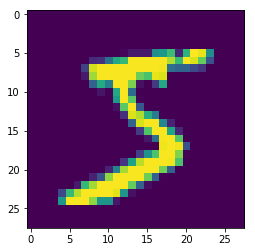

In [6]:
plt.imshow(X_train[0])

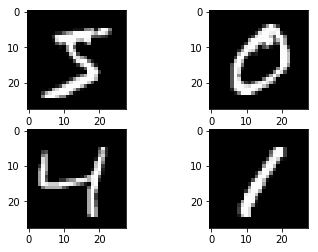

In [7]:
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))

In [8]:
# Tensorflow backend needs reshape to samples, height, width, channels
# https://stackoverflow.com/questions/41651628/negative-dimension-size-caused-by-subtracting-3-from-1-for-conv2d
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [9]:
X_train.shape

(60000, 28, 28, 1)

In [10]:
X_train[0][5][4][0]

0.0

In [11]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [12]:
print(Y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [13]:
# Tensorflow backend input_shape=(samples, height, width, channels)
# https://stackoverflow.com/questions/41651628/negative-dimension-size-caused-by-subtracting-3-from-1-for-conv2d
# Model
model = Sequential()
model.add(Conv2D(30, (5, 5), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(15, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Fully connected to classify
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [14]:
model.get_layer(None, 5).output_shape

(None, 375)

In [15]:
# Compile
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [16]:
# Train
history = model.fit(X_train, Y_train,
          validation_data=(X_test, Y_test),
          epochs=5,
          batch_size=200,
          verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 97s 2ms/step - loss: 0.3679 - acc: 0.8892 - val_loss: 0.0720 - val_acc: 0.9778
Epoch 2/5
60000/60000 [==============================] - 62s 1ms/step - loss: 0.0932 - acc: 0.9714 - val_loss: 0.0558 - val_acc: 0.9826
Epoch 3/5
60000/60000 [==============================] - 53s 876us/step - loss: 0.0683 - acc: 0.9792 - val_loss: 0.0401 - val_acc: 0.9874
Epoch 4/5
60000/60000 [==============================] - 50s 833us/step - loss: 0.0542 - acc: 0.9836 - val_loss: 0.0346 - val_acc: 0.9891
Epoch 5/5
60000/60000 [==============================] - 102s 2ms/step - loss: 0.0499 - acc: 0.9845 - val_loss: 0.0284 - val_acc: 0.9904


In [17]:
# Evaluate
score = model.evaluate(X_test, Y_test, verbose=0)


In [18]:
print("CNN Error: %.2f%%" % (100-score[1]*100))
print("Loss: %.2f" % score[0])
print("Accurracy: %.2f%%" % (score[1]*100))

CNN Error: 0.96%
Loss: 0.03
Accurracy: 99.04%


In [19]:
score

[0.028366301041067344, 0.9904]

In [20]:
model.metrics_names

['loss', 'acc']

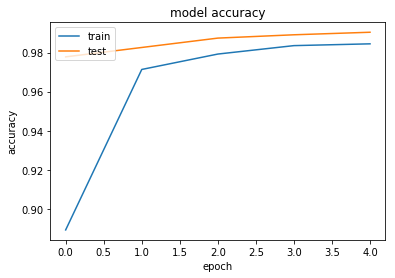

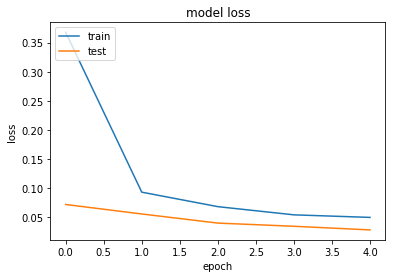

In [21]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()